In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')
df = pd.concat([train_df, test_df], ignore_index=True)

#randomize
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [17]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


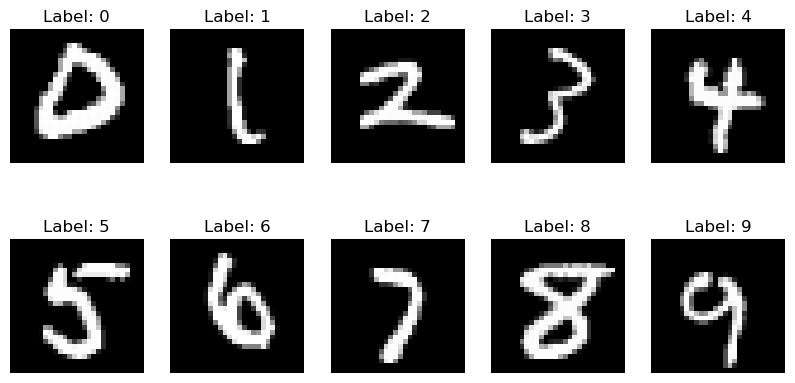

In [14]:
numbers = df.groupby("label").head(1).sort_values("label").reset_index(drop=True)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()

for i in range(len(numbers)):
    label = numbers.iloc[i, 0]
    image_data = numbers.iloc[i, 1:].values.reshape(28, 28)
    axes[i].imshow(image_data, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Label: {label}')

plt.show()

In [ ]:
# Pre process the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# separate label column
X = df.drop('label', axis=1).values
y = df['label'].values

# split the data
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=11)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=11)

scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_vld = scaler.transform(X_vld)
X_tst = scaler.transform(X_tst)

# add the bias term to X_trn, X_vld, X_tst
X_trn = np.hstack( [np.ones([X_trn.shape[0], 1]), X_trn] )
X_vld = np.hstack( [np.ones([X_vld.shape[0], 1]), X_vld] )
X_tst = np.hstack( [np.ones([X_tst.shape[0], 1]), X_tst] )

# KNN (K Nearest Neighbor)

In [ ]:
# create euclidean distance function
def distance(point1, point2):
    differences = point1 - point2
    squared_differences = differences ** 2
    sum_squared = squared_differences.sum()
    euclidean_distance = np.sqrt(sum_squared)
    return euclidean_distance